In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\Latency_and_time_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\general_purpose_functions.ipynb"

####  Read the data 

In [2]:
csv_file_path='C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv' 
runs = pd.read_csv(csv_file_path)
latency_medians = runs.groupby(['group', 'rat', 'stim_condition', 'session_nr'])['latency_to_cp_entry'].describe().reset_index()

#### Latency density plots and cumulative distributions

<Figure size 1800x1200 with 0 Axes>

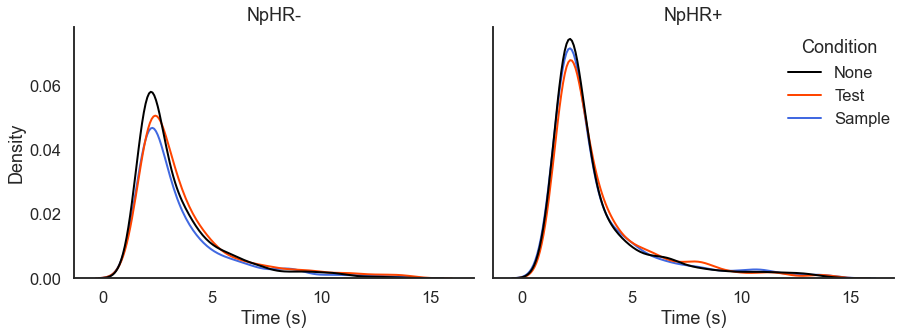

<Figure size 1800x1200 with 0 Axes>

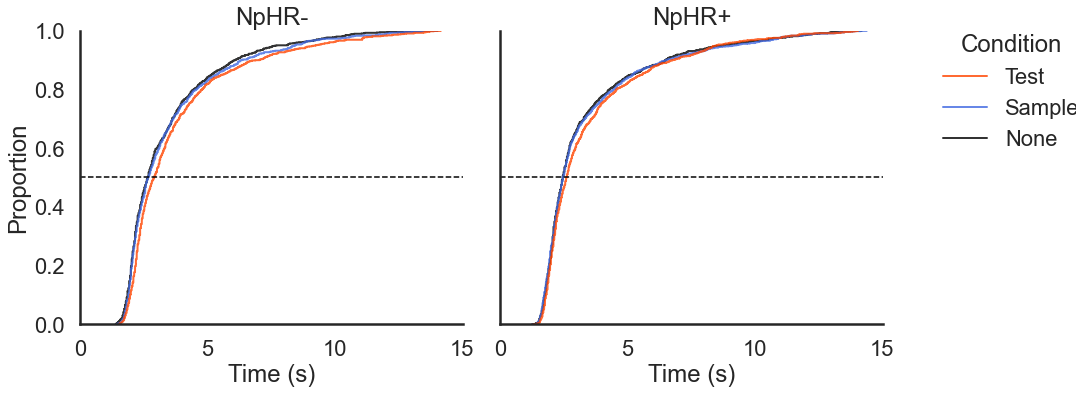

In [3]:
a = plot_latency_distributions_within_group(runs,'kde',
                                            'latency_to_cp_entry',
                                            ['black', 'orangered','royalblue'])
a.set(xlabel='Time (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
g = plot_cumulative_distributions_within_group(runs, 'latency_to_cp_entry')
# subplot specs
axes = g.axes.flatten()
axes[0].set(title="NpHR-", xlabel='Time (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
axes[0].axhline(0.5, 0, 15, linestyle='dashed', c='black', linewidth=1.5)
axes[1].set(title="NpHR+", xlabel='Time (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))
axes[1].axhline(0.5, 0, 15, linestyle='dashed', c='black', linewidth=1.5)

#### Are the latency distributions significantly influenced by condition and group?
###### To do this we will use an inverse transformation of the latency variable, previously calculated. Below we can see their distributions. Although it is clearly not guassian, the skewness and kurtosis (below) decreased quite a lot. I will resort to a linear mixed model to account for the dependency of data within conditions and check afterwards the assumptions of the model.

latency_to_cp_entry: skew=2.1510699459384583, kurtosis=4.7382815787471495
inv_latency_to_cp_entry: skew=-0.18892546959670212, kurtosis=-0.8763649341859674


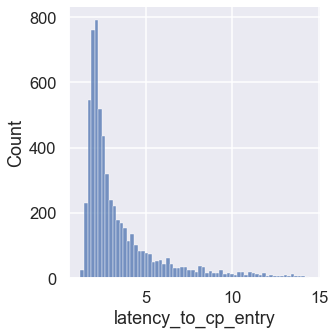

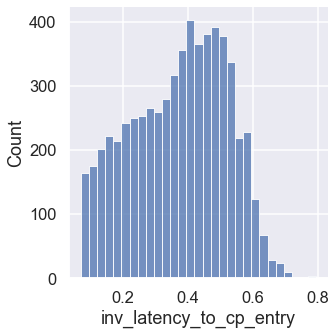

In [4]:
check_variables_distribution_parameters(runs, 'latency_to_cp_entry')
check_variables_distribution_parameters(runs, 'inv_latency_to_cp_entry')

<Figure size 1800x1200 with 0 Axes>

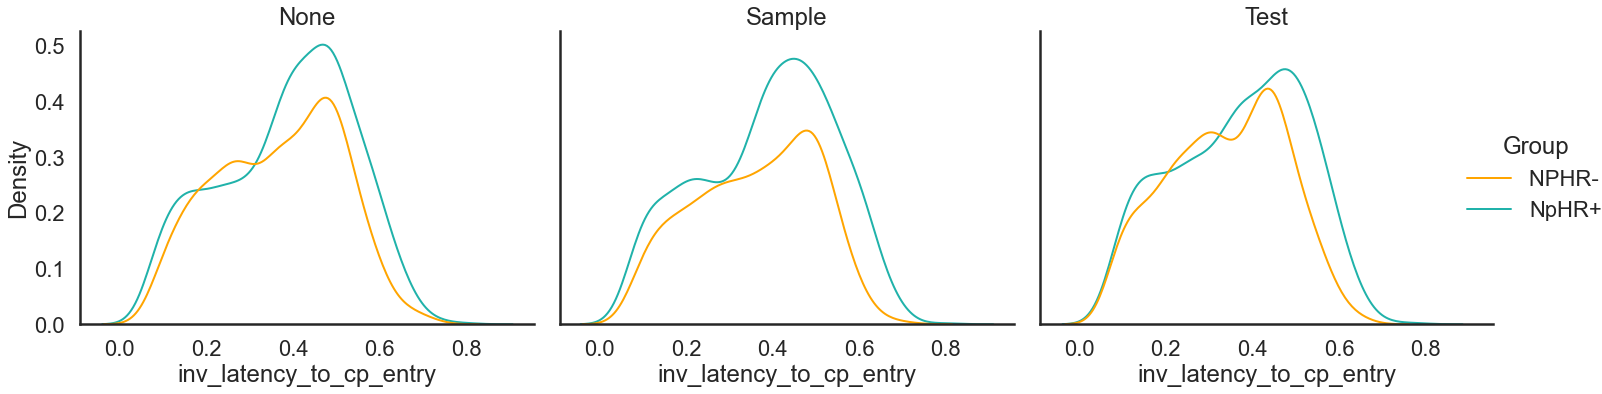

In [40]:
a = plot_latency_distributions_within_condition(runs,'kde',
                                            'inv_latency_to_cp_entry')

In [32]:
rmse_results=pd.DataFrame()

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from statsmodels.regression.mixed_linear_model import MixedLMResults

md = smf.mixedlm("inv_latency_to_cp_entry ~ C(group) + C(stim_condition) + C(group)*C(stim_condition)", 
                 data=runs, groups=runs["rat"], re_formula="~C(stim_condition)")

mdf = md.fit()
print(mdf.summary())

NameError: name 'runs' is not defined

In [6]:
y_predict = mdf.fittedvalues
y=runs['inv_latency_to_cp_entry']
RMSE = np.sqrt(((y-y_predict)**2).values.mean())
rmse_results.loc['random slope + random intercept+*',0]=RMSE
print(rmse_results)

NameError: name 'mdf' is not defined

In [7]:
check_linear_model_assumptions(mdf, runs)

NameError: name 'mdf' is not defined

<AxesSubplot:xlabel='Group', ylabel='Median Time (s)'>

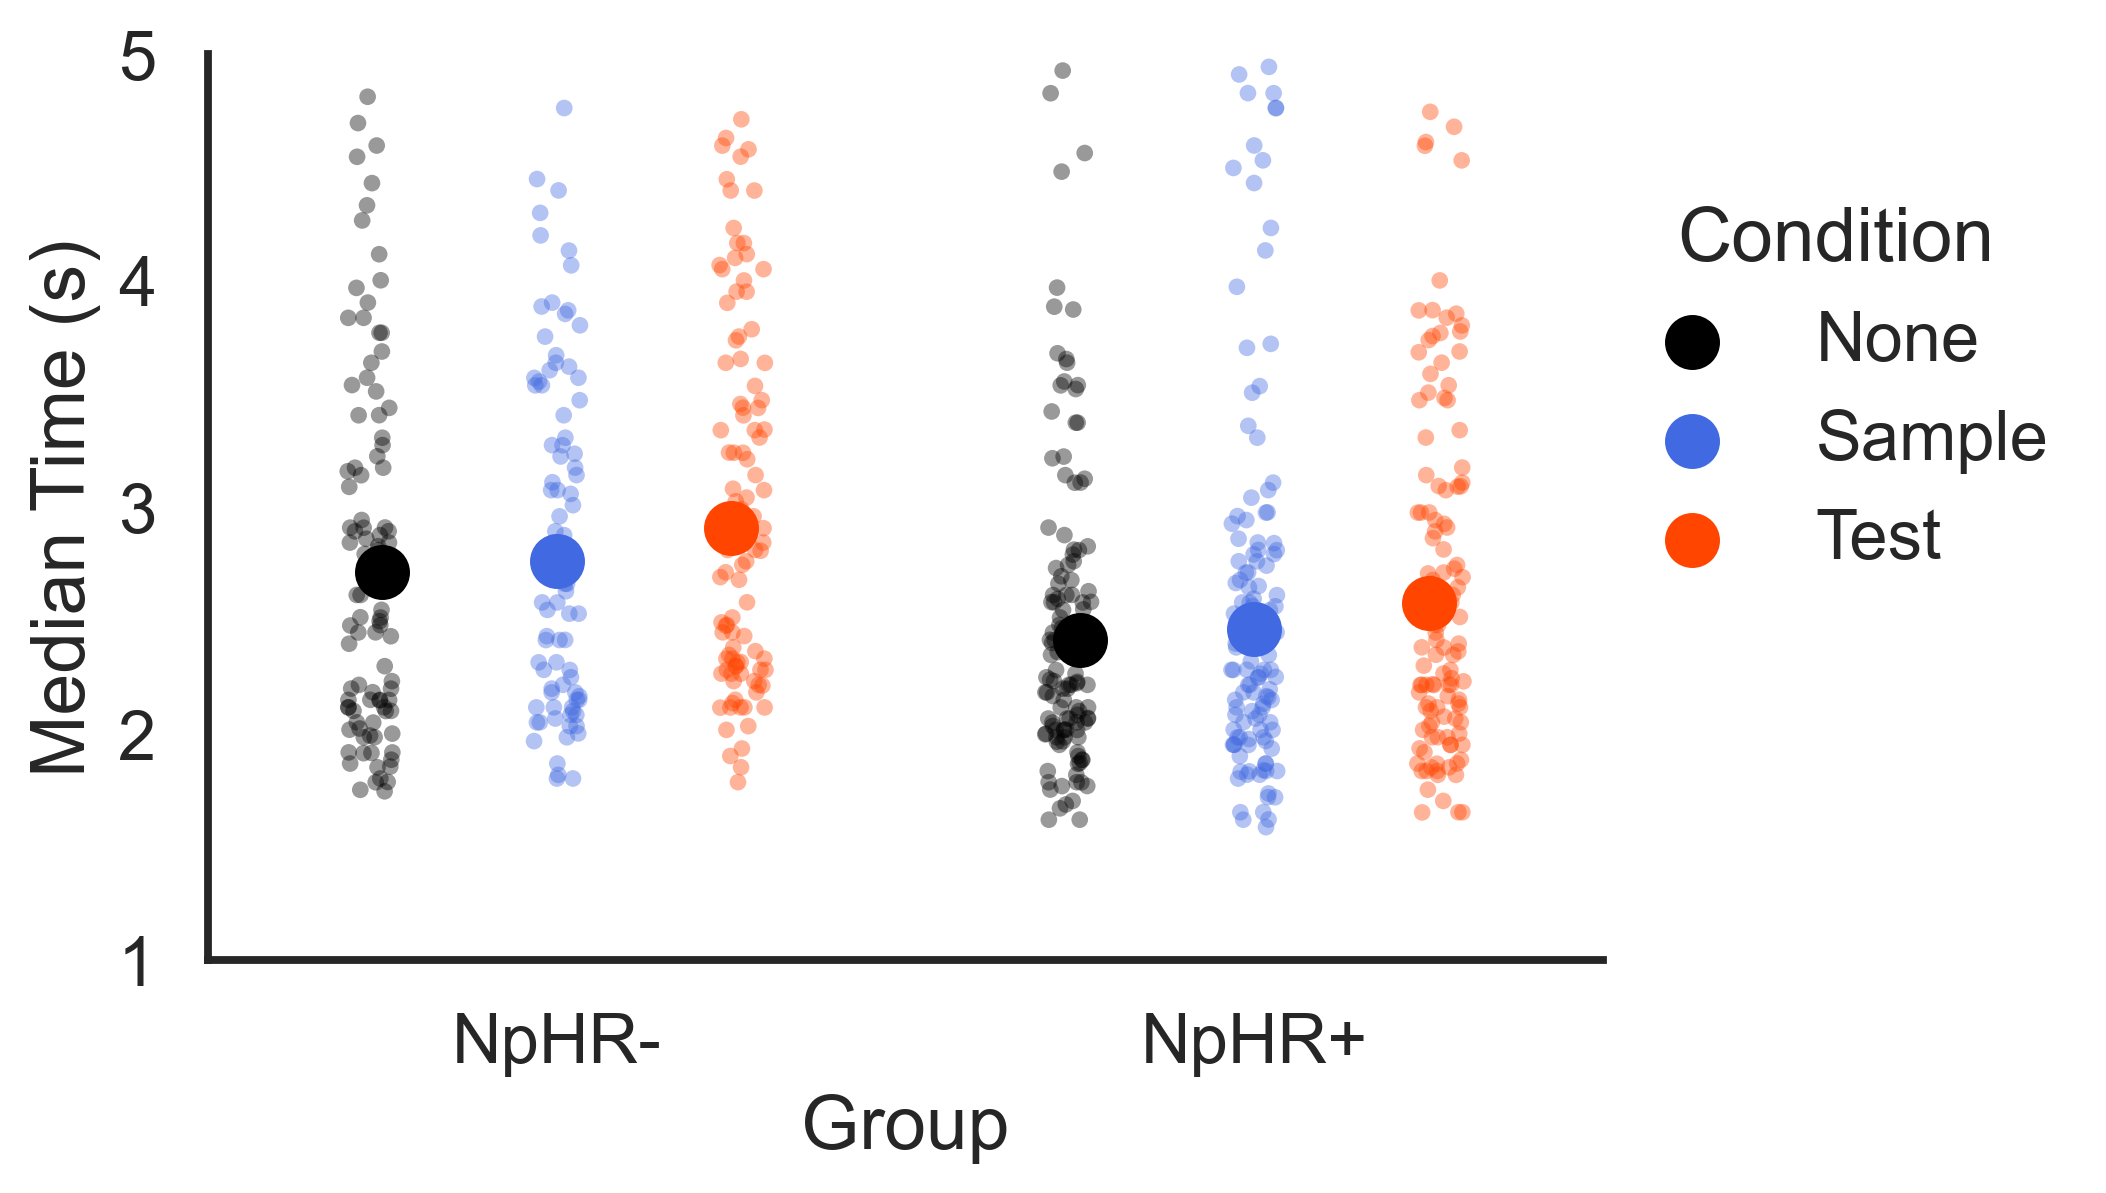

In [8]:
plot_distribution_of_session_medians(latency_medians)

####  Latency density plots and cumulative distributions between groups 

In [ ]:
a = plot_latency_distributions_within_condition(runs,'kde','latency_to_cp_entry')
g = plot_cumulative_distributions_within_condition(runs, 'latency_to_cp_entry')
a.set(xlabel='Time', xticks=range(0,20,5), xticklabels=range(0,20,5))
g.set(xlabel='Time (s)', xticks=range(0,20,5), xticklabels=range(0,20,5))

####  Inference testing on latency to choice point distributions within conditions

In [ ]:
ctrls, nphrs=subidivide_by_group_and_condition(runs)

In [ ]:
a = [ctrls['None'], ctrls['Sample'], ctrls['Test']]
b = [nphrs['None'], nphrs['Sample'], nphrs['Test']]
results = inference_testing_mannwhitneyu(a,b, 'latency_to_cp_entry')

In [ ]:
results